In [15]:
! pip install librosa


In [16]:
import librosa

audio_path = '/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/spoof/LA_D_1034049.flac'
x , sr = librosa.load(audio_path)

In [ ]:
print(x.shape, sr)


(36705,) 22050


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

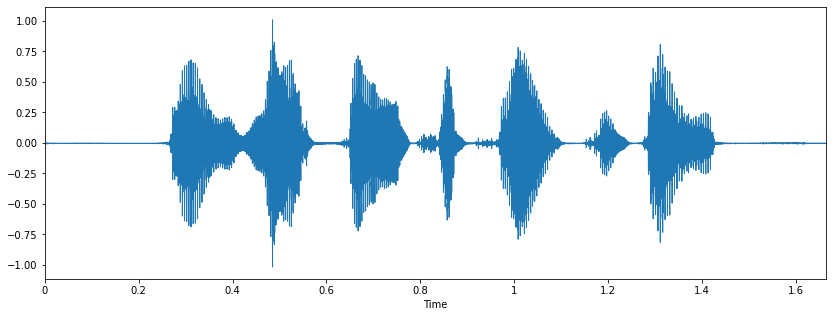

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

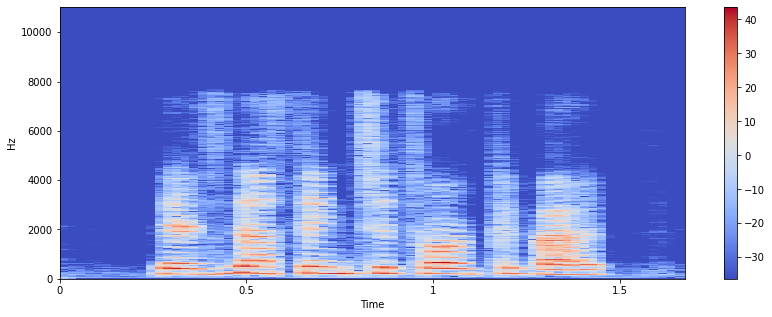

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

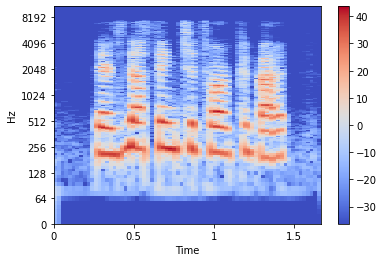

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 72)


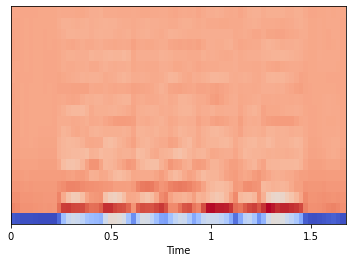

In [ ]:
mfccs = librosa.feature.mfcc(x, sr)
print (mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[-3.08395285e-16 -3.70074342e-17  1.23358114e-17  8.01827740e-17
  3.70074342e-17  0.00000000e+00 -1.04854397e-16  9.86864911e-17
 -2.71387850e-16 -4.93432455e-17  2.46716228e-17 -3.70074342e-17
 -7.40148683e-17 -1.60365548e-16  6.78469626e-17  6.32210333e-17
 -1.85037171e-17 -1.85037171e-16  9.86864911e-17 -1.51113689e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


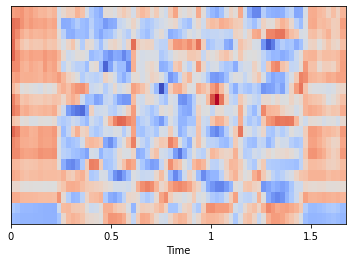

In [ ]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [17]:

# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'bonafide spoof'.split()
for g in genres:
    pathlib.Path(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}'):
        songname = f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        #plt.show()
        plt.savefig(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        #files.download(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        #break;
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
rmse = librosa.feature.rmse(y=y)
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'bonafide spoof'.split()
for g in genres:
     for filename in os.listdir(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}'):
        songname = f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [19]:
data = pd.read_csv('data.csv')
print(data)

              filename  chroma_stft     rmse  ...     mfcc19     mfcc20     label
0    LA_D_1105538.flac     0.465003  0.11715  ...  -9.145386  -5.020218  bonafide
1    LA_D_1047731.flac     0.414566  0.11715  ... -10.187996  -9.010710  bonafide
2    LA_D_1119156.flac     0.478110  0.11715  ...  -3.422246  -6.079139  bonafide
3    LA_D_1090286.flac     0.443551  0.11715  ...  -5.328352  -7.243760  bonafide
4    LA_D_1125976.flac     0.440505  0.11715  ...  -8.855256  -9.454005  bonafide
..                 ...          ...      ...  ...        ...        ...       ...
395  LA_D_5423215.flac     0.270318  0.11715  ... -11.908414  -9.055505     spoof
396  LA_D_5461745.flac     0.279058  0.11715  ... -13.609817  -9.343741     spoof
397  LA_D_5505761.flac     0.265140  0.11715  ... -12.307285 -11.237685     spoof
398  LA_D_5508053.flac     0.272854  0.11715  ... -13.445527 -10.661691     spoof
399  LA_D_5509091.flac     0.275320  0.11715  ... -14.573365 -12.403651     spoof

[400 rows x 28 

In [20]:
data = data.drop(['filename'],axis=1)

In [23]:
genre_list = data.iloc[:, -1]
print (genre_list)
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

0      bonafide
1      bonafide
2      bonafide
3      bonafide
4      bonafide
         ...   
395       spoof
396       spoof
397       spoof
398       spoof
399       spoof
Name: label, Length: 400, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
print(X)

[[ 1.43530506  0.          2.39334892 ...  0.85096253  0.6847764
   2.32437591]
 [ 0.75951422  0.          0.33003529 ... -0.05880271  0.32066832
   0.20102858]
 [ 1.61090963  0.          0.64428632 ...  1.88089533  2.68345357
   1.76092243]
 ...
 [-1.2425593   0.          0.6027256  ... -1.31778494 -0.4194453
  -0.9839488 ]
 [-1.13920646  0.         -1.34817816 ... -1.48283286 -0.81695031
  -0.67746119]
 [-1.10616532  0.         -1.13085665 ... -0.45988112 -1.21082247
  -1.60436105]]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

print(len(y_train))

print(len(y_test))

print(X_train[10])

320
80
[ 1.3608961   0.          0.28110805  1.50317694  1.28441985 -0.82923041
 -1.34357963 -1.66841347  1.63322022 -0.38539676  0.78994997  0.09820129
  0.30396563  1.40780029  1.69401878  0.10630301  1.03287288  1.7887558
 -0.6638213   1.56248769  1.05978611  0.99798996  0.26370436  0.3316962
  1.66931142  2.01300596]


In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train,
                    y_train,
                    epochs=3,
                    batch_size=128)

Epoch 1/3
3/3 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.7688
Epoch 2/3
3/3 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.9937
Epoch 3/3
3/3 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9969


In [30]:
test_loss, test_acc = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9875


In [31]:
print('test_acc: ',test_acc)

test_acc:  0.987500011920929


In [32]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [45]:

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=32,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/30
4/4 [==============================] - 0s 39ms/step - loss: 0.4882 - accuracy: 0.8583 - val_loss: 0.1958 - val_accuracy: 0.9950
Epoch 2/30
4/4 [==============================] - 0s 9ms/step - loss: 0.1186 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9950
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9950
Epoch 4/30
4/4 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9950
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 4.0407e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0098e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 3.2940e-05 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/30
4/4 [====

In [46]:
predictions = model.predict(X_test)
print(y_test)

[0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 0]


In [47]:
print(predictions)

[[5.5837674e-08]
 [1.0000000e+00]
 [5.8214372e-15]
 [9.9999952e-01]
 [9.9999082e-01]
 [1.3552132e-06]
 [1.0000000e+00]
 [2.8988749e-09]
 [9.9999368e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999952e-01]
 [1.2225146e-07]
 [3.5401727e-15]
 [2.0641800e-12]
 [2.0830029e-15]
 [2.5749400e-10]
 [4.7116991e-08]
 [1.0000000e+00]
 [1.4022856e-09]
 [1.0000000e+00]
 [9.9999452e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.4028759e-09]
 [1.0000000e+00]
 [4.3308142e-15]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.6836105e-16]
 [1.0000000e+00]
 [9.9999976e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.8998585e-16]
 [1.0000000e+00]
 [1.3160188e-14]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0402572e-09]
 [8.2334633e-17]
 [1.0000000e+00]
 [9.8930579e-01]
 [1.0000000e+00]
 [4.1136459e-09]
 [1.7106405e-10]
 [1.0000000e+00]
 [2.6746278e-08]
 [7.1128693e-07]
 [1.3065008e-07]
 [1.4431460e-05]
 [6.6702710e-09]
 [6.3614246e-11]
 [1.0000000e+00]
 [9.9999815e-01]
 [1.0000000e+00]
 [5.3464574e-14]
 [1.5630937e-0

In [ ]:
print(np.sum(predictions[0]))

np.argmax(predictions[0])

1.0


0